# **Word Vectors**
Words can be represented as word vectors and be embedded into a semantic vector
space. In this space, we can apply linear operations to find word analogies and calculate word similarities (e.g., based on the cosine similarity of their vectors). Furthermore, word vectors (also called word embeddings) can be used as input for machine learning models, such as linear classifiers or artificial neural networks [[1]](#scrollTo=I8V9kOvBMH6-).

This notebook shows examples for the following topics:
* One-hot vector
* Word2Vec
* Visualization of word vectors


## **One-hot vector**
In order to mathematically process the similarities or relations between word tokens, we should encode each token into some vector that represents a point in some word space. 

For this purpose, we can use one-hot vector which is a bag-of-words vector for just a single word, i.e., it is 0 at all indexes except at the index of the considered word where it is 1 [[1]](#scrollTo=I8V9kOvBMH6-).


In this section, we will demonstrate word vectorization of the following string [[2]](https://github.com/ujhuyz0110/wrd_emb/blob/master/word2vec_skipgram_medium_v1.ipynb):


"*Federer is one of the greatest tennis players of all time.
Federer has won twenty grand slam titles to date.*"
<br><br/>
Firstly, we will import required libraries and then define 3 functions:
1. ``tokenize()``: obtains tokens with at least 1 alphabetic character,
2. ``mapping()``: assigns an ID to the tokens which are found by the ``tokenize()``function,
3. ``integer_encoding()``: creates ``integer_encoded_text``

Finally, we will create a one-hot vector for the given text.






### Import libraries and define functions

#### Import ``NumPy`` and ``re``
``NumPy`` arrays are faster and more compact than Python lists. An array consumes less memory [[3]](https://numpy.org/doc/stable/user/absolute_beginners.html).

In [ ]:
# Import NumPy for array operations
# Import re for regular expressions

import numpy as np
import re

#### Create ``tokenize()`` function
This function obtains tokens with at least one alphabetic character.
The function takes an input ``text`` and returns the matching patterns.

In [ ]:
# Create "tokenize" function
def tokenize(text):
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

#### Create ``mapping()`` function
This function assigns an ID to the tokens which are found by the ``tokenize()`` function.

It takes an input ``tokens`` and creates two empty dictionaries as ``word_to_id`` and ``id_to_word``. Then it matches each token with its index number and appends it to the dictionaries. Finally, it returns both of dictionaries.


In [ ]:
# Create "mapping" function
def mapping(tokens):
    # Create dictionaries
    word_to_id = dict()
    id_to_word = dict()

    # Create a loop which matches each token with its index number and appends it to the dictionaries 
    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token
        
    # Return both dictionaries
    return word_to_id, id_to_word

#### Create ``integer_encoding()`` function

This function takes the following inputs and returns ``integer_encoded_text``:
* ``tokens`` is the unique tokens returned by the ``tokenize()`` function.
* ``word_to_id`` is the dictionary returned by the ``mapping()`` function.



In [ ]:
# Create "integer_encoding" function
def integer_encoding(tokens, word_to_id):

    # Declare a variable "N" and assign the number of unique tokens to it
    N = len(tokens)

    # Create an empty list 
    integer_encoded_text = []

    # Append the ID of each word into the list "integer_encoded_text"
    ## It loops over the given string and replaces each word with its ID.
    for i in range(N):
      integer_encoded_text.append(word_to_id[tokens[i]])

    # Convert list to numpy-array        
    integer_encoded_text = np.array(integer_encoded_text)
    
    # Convert array to a single row vector
    integer_encoded_text = np.expand_dims(integer_encoded_text, axis=0)
    return integer_encoded_text

### Define text and create one-hot vector

#### Create sample document

In [ ]:
# Create sample document
doc = "Federer is one of the greatest tennis players of all time. \
Federer has won twenty grand slam titles to date."

#### Get ``tokens`` from the document and print ``tokens``

In [ ]:
# Get tokens from the document doc
tokens = tokenize(doc)

# Print tokens
print(tokens)

['federer', 'is', 'one', 'of', 'the', 'greatest', 'tennis', 'players', 'of', 'all', 'time', 'federer', 'has', 'won', 'twenty', 'grand', 'slam', 'titles', 'to', 'date']


#### Map ``tokens`` and print each word with its ID

In [ ]:
# Map tokens to integer IDs
word_to_id, id_to_word = mapping(tokens)

# Print each word with its ID
for word, id in zip(word_to_id, id_to_word):
  print(f'word: {word} \t id: {id}')

word: the 	 id: 0
word: of 	 id: 1
word: grand 	 id: 2
word: tennis 	 id: 3
word: titles 	 id: 4
word: players 	 id: 5
word: time 	 id: 6
word: one 	 id: 7
word: greatest 	 id: 8
word: all 	 id: 9
word: federer 	 id: 10
word: won 	 id: 11
word: date 	 id: 12
word: slam 	 id: 13
word: to 	 id: 14
word: is 	 id: 15
word: has 	 id: 16
word: twenty 	 id: 17


#### Convert given text to integers

In [ ]:
# Convert the given text to integer form by using the "integer_encoding" function
integer_encoded_text = integer_encoding(tokens, word_to_id)

# Print the integer encoded text
print(integer_encoded_text)

[[10 15  7  1  0  8  3  5  1  9  6 10 16 11 17  2 13  4 14 12]]


#### Create and print one-hot vector 

In [ ]:
# Define shape of one-hot vector
##Rows
vocab_size = len(id_to_word)
##Columns
m = integer_encoded_text.shape[1]

# Create one-hot vector
one_hot_vector = np.zeros((vocab_size, m))

# Turn integer_encoded_text into one-hot vector
one_hot_vector[integer_encoded_text.flatten(), np.arange(m)] = 1

# Print one-hot vector
print(one_hot_vector)

[[0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

## **Word2Vec** 

In this section, we will introduce ``Word2Vec``, an embedding technique developed at Google. ``Word2Vec`` uses a simple neural network with only one hidden layer for the
generation of word embeddings [[1]](#scrollTo=I8V9kOvBMH6-).

If a model has been trained with a big dataset like the ``word2vec-google-news-300``, we can apply word analogies on that model.

The similarity between two words can be measured as a numeric distance. In ``gensim``, the function ``most_similar()`` finds the most similar word to a given word based on the cosine similarity between their word vectors. For more details about cosine similarity, please refer to [[4]](https://radimrehurek.com/gensim/models/keyedvectors.html).

### Import a pre-trained model by using ``gensim``
``gensim`` includes different pre-trained models. You can download a model by importing ``gensim.downloader``.

For the following examples, we load ``word2vec-google-news-300`` model.

In [ ]:
# Import gensim downloader to load the model
import gensim.downloader as api

# Import Word2Vec model
from gensim.models import Word2Vec

# Load word2vec-google-news-300 model
word_vectors = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
# NOTE: This code cell is optional. To run a code, please uncomment it
#       The shortcut to comment/uncomment a selected code is CTRL+/       

# To see the list of all available gensim datasets, run the following code:
# info = api.info()
# for each in info['corpora']:
#  print(each)

# To see the list of all available gensim pre-trained models, run the following code:
# for each in info['models']:
#  print(each)

# To see detailed information about the available gensim pre-trained models, run the following code:
# info['models']

### Examples for word analogies

#### What's the capital of France?
If we know the capital of one country, what's the capital of France? 


In [ ]:
# Calculate the "most similar words" and save them to the list "result"
## Parameters:  positive (list of str, optional) – List of words that contribute positively
##              negative (list of str, optional) – List of words that contribute negatively
result = word_vectors.most_similar(positive=['Berlin', 'France'], negative=['Germany'])

# result[0] returns the first element of the list
## The first element contains the most similar word and its similarity score
## We assign this data to the variables "most_similar_key" and "similarity"
most_similar_key, similarity = result[0]

# Print the most similar word and its similarity score
print(f"{most_similar_key}: {similarity:.4f}")

# Create a loop to print the first 10 results
print('\n------first 10 results---------------')
for i in range(0,9):
  most_similar_key, similarity = result[i]
  print(f"{most_similar_key}: {similarity:.4f}")


Paris: 0.7672

------first 10 results---------------
Paris: 0.7672
French: 0.6049
Parisian: 0.5810
Colombes: 0.5600
Hopital_Europeen_Georges_Pompidou: 0.5559
Melun: 0.5513
Dinard: 0.5452
Brussels: 0.5421
Mairie_de: 0.5337


#### What do French people drink?
When Germans drink beer, what do French people drink?

In [ ]:
# Calculate the "most similar words" and save them to the list "result"
## Parameters:  positive (list of str, optional) – List of words that contribute positively
##              negative (list of str, optional) – List of words that contribute negatively
result = word_vectors.most_similar(positive=['Beer', 'France'], negative=['Germany'])

# result[0] returns the first element of the list
## The first element contains the most similar word and its similarity score
## We assign this data to the variables "most_similar_key" and "similarity"
most_similar_key, similarity = result[0]

# Print the most similar word and its similarity score
print(f"{most_similar_key}: {similarity:.4f}")


Wine: 0.5270


#### Similarity between "tallest" and "tall"
The similarity between "tallest" and "tall" is like the similarity between "long" and "..?.."

In [ ]:
# Calculate the "most similar words" and save them to the list "result"
## Parameters:  positive (list of str, optional) – List of words that contribute positively
##              negative (list of str, optional) – List of words that contribute negatively
result = word_vectors.most_similar(positive=['long', 'tallest'], negative=['tall'])

# result[0] returns the first element of the list
## The first element contains the most similar word and its similarity score
## We assign this data to the variables "most_similar_key" and "similarity"
most_similar_key, similarity = result[0]

# Print the most similar word and its similarity score
print(f"{most_similar_key}: {similarity:.4f}")


longest: 0.5581


## **Visualizing word vectors**  

With the help of the principal component analysis (PCA), high-dimensional vectors can be projected to a lower dimension. In this section, we will use ``Word2Vec`` to project word embeddings which represent terms of food items or beverages into a two-dimensional scatterplot [[1]](#scrollTo=I8V9kOvBMH6-).

We will apply the following steps [[5]](https://web.stanford.edu/class/cs224n/materials/Gensim%20word%20vector%20visualization.html):

1. Import ``pyplot`` and ``numpy`` libraries.
2. Define a list ``ingredients`` that contains the food items.
3. Define a function ``display_pca_scatterplot()``.
4. Visualize the food items on a 2D PCA scatterplot.



### Import Pyplot, NumPy and PCA libraries

In [ ]:
# Import Pyplot and NumPy libraries
import matplotlib.pyplot as plt
import numpy as np

# Import PCA class from sklearn library for visualizing principal components analysis
from sklearn.decomposition import PCA 

# Set a default style for the plot. The style "bmh" stands for "Bayesian Methods for Hackers" stylesheet
plt.style.use('bmh')

### Define a list ``ingredients``

In [ ]:
# Define a list that contains food items
ingredients = [
               'bread', 'butter', 'burger', 'cheese','coffee', 'coke',
               'espresso','honey', 'jam','juice','liquor','milk', 'pizza',
               'sandwich', 'tea', 'toast','wine'
               ]

### Define ``display_pca_scatterplot()`` function

This function takes two inputs: ``model`` and ``words``:
* ``model``: Pre-trained model with word vectors (``word2vec-google-news-300``) which was imported in the section `Word2Vec`.
* ``words``: Sample words which are represented as vectors in the model. We have defined the list ``ingredients`` for this input.

The input ``words``is  stored in a numpy-array ``word_vectors``.
Then, ``word_vectors`` is transformed into a two-dimensional matrix by using scikit-learn module ``PCA``.
Finally, the matrix is projected on a two-dimensional scatterplot by using pyplot.

In [ ]:
# Define "display_pca_scatterplot()" function
def display_pca_scatterplot(model, words):

    # Get word vectors for input words from the word2vec model
    word_vectors = np.array([model[w] for w in words])
    
    # Transfrom the word vectors into a two-dimensional matrix
    twodim = PCA(n_components=2).fit_transform(word_vectors)[:,:2]    

    # Create scatterplot
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    plt.plot([-2, 2], [2, -2], ls="-", c="c")
    
    # Add names at upper right corner to the drawn points
    for word, (x,y) in zip(words, twodim):
      plt.text(x+0.05, y+0.05, word)


### Visualize the food items on a 2D PCA scatterplot

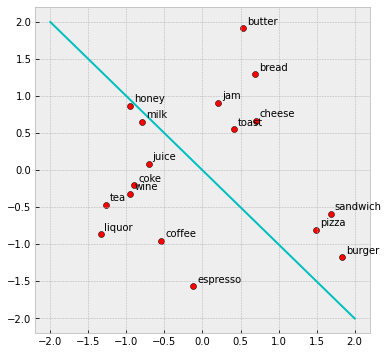

In [ ]:
# Run the function "display_pca_scatterplot()" and visualize the food items on a 2D PCA scatterplot
display_pca_scatterplot(word_vectors, ingredients)

# **References**

- [1] Course Book "NLP and Computer Vision" (DLMAINLPCV01)
- [2] https://github.com/ujhuyz0110/wrd_emb/blob/master/word2vec_skipgram_medium_v1.ipynb
- [3] https://numpy.org/doc/stable/user/absolute_beginners.html
- [4] https://radimrehurek.com/gensim/models/keyedvectors.html
- [5] https://web.stanford.edu/class/cs224n/materials/Gensim%20word%20vector%20visualization.html


Copyright © 2022 IU International University of Applied Sciences